# Welcome to Steven's Analysis of the performance of Amtrak in the last 10 years!

>The data I will be working with is provided directly from bts.gov, or the "Bureau of Transportation Statistics", meaning it is as accurate as can be

>I will be focusing on overall trends and drawing conclusions of the data

>There will be multiple graphs, which demonstrat yearly trends and drawn conclusions as to where the delays are coming from

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Essential Inputs
import pandas as pd #Data analysis
import numpy as np #formatting data
import matplotlib.pyplot as plt #plotting data

In [3]:
# Now we can import the data and begin
fName = "..//Data//Amtrak_performance_data.csv"
data = pd.read_csv(fName)

# There shouldn't be any need to normalize the data
# since were not doing predictions

#this will make it look nicer Updated : 11/26
plt.style.use('fivethirtyeight')

### Primary Analysis: HOD over Years
>Without considering the cause of the hours of delay, have they improved? or have they gotten worse over the years.

# CSV headers: Year,OTP,NE,SS,LDB,SD,LD,HODbC,Amtrak,HR,Other

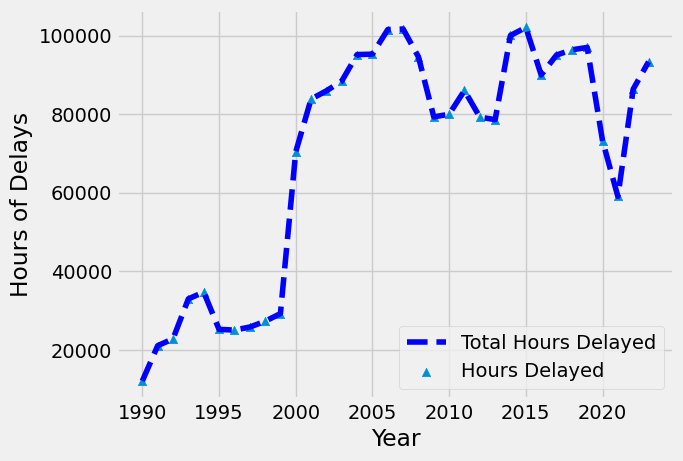

In [4]:
years = data['Year']    #X Axis - years as a timeline
# Since there are some N values, we got to convert those
# into something usable > Hours Delayed by cause
hod = pd.to_numeric(data['HODbC'], errors='coerce') # Y - Axis

#Plotting
plt.plot(years, hod, color='blue', label = 'Total Hours Delayed', linestyle="--" )
plt.scatter(years, hod,  label = 'Hours Delayed', marker = '^')
plt.xlabel('Year')
plt.ylabel('Hours of Delays')
plt.legend()



### Observations
>Its not 100% clear of the trends with delays, we can say that the delays have definitely increased since the 1990's, and have now begun to stagnate and even generally decline
>The lowest points are those <2000, ~2007 - 2013, and ~2022 (Likely covid)
>We can safely say that 2022 may be considered an outliar, however the trend still stands as after we no longer see peaks as high as in ~2018 or ~2006

##### We can create a line of best fit to capture trends

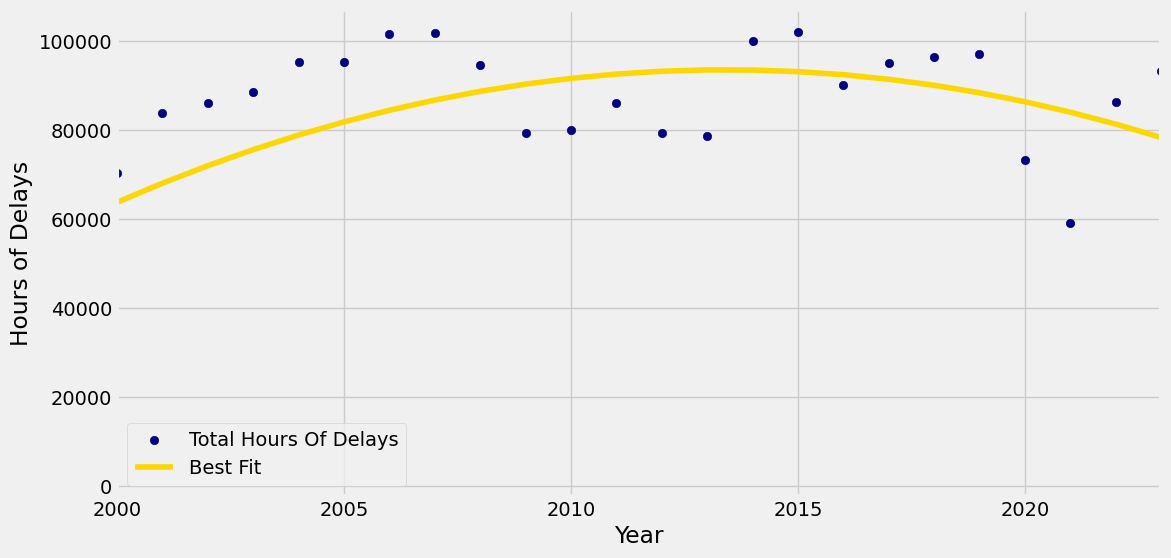

In [5]:
# Data has N in it, as we know, and I want to be able to mask
# Replaces N into a 'value', Null is easier to work with than strings
data.replace('N', np.nan, inplace=True)
# Here we convert yet again to numbers, since before it was strings
data['HODbC'] = pd.to_numeric(data['HODbC'], errors='coerce')
# And we can remove all elements in the same row as where the NaNs are
filteredData = data.dropna(subset=['HODbC'])

# Now that data is filtered, we can call and have interpretable results
hod = filteredData['HODbC']
years = filteredData['Year']
#print(hod)


# Get a line of best fit using least squares with provided np function
coefficients = np.polyfit(years, hod, 2)
best_fit_line = np.poly1d(coefficients)
#print(best_fit_line) all for testing

# Plot the line and data points (Shows accuracy roughly)
plt.figure(figsize=(12,6))

plt.scatter(years, hod, color = 'navy', label = 'Total Hours Of Delays')
plt.plot(years, best_fit_line((years)), color = 'gold', label = 'Best Fit')
plt.xlabel('Year')
plt.ylabel('Hours of Delays')
plt.xlim(2000,2023) #I manually set delays here since the indexing was getting on my nerves


plt.legend()
plt.show()

### Overview
> The graph shows a very large increase, into a slight decrease as time goes on! Atleast on paper. So in the last 10 years, we can safely say that Amtrak is getting better at reducing delays
### Cause?
> If we look further, we see that amtrak has quintupled their delays! That sounds horrible, until we consider outside conditions. Technology has been advancing, construction, and natural causes all contribute to delays. So while it may seem like there are overall More delays, there are also leagues more trains running than in the past 

In [9]:
# We can get more of the data again
fName2 = '..//Data//Amtrak_Active_Railroads.csv'
Railroads = pd.read_csv(fName2)

# Ideally, I want to sum the railroads at a given year since
# amtrak is not limited to one rail
Railroads['Total Rail'] = Railroads[['Rail Transit', 'Commuter Rail', 'Heavy Rail', 'Light Rail']].sum(axis=1, skipna=True) #Ignore Nan


#Ridership
fName3 = '..//Data//Amtrak_Ridership.csv' #meh wish I could name better
Ridership = pd.read_csv(fName3) 


In [12]:
# Now that we have all the data necessary, we can draw 
# conclusions based on the number of railroads overtime.
Rails = Railroads['Amtrak']

# I believe the datasets have different years
RR_years = Railroads['Year']



# total ridership over years (Amtrak), this should represent general traffic along with the rails
#This has actual ridership by region, so sum all stations :>
RidersByYear = Ridership.groupby('Fiscal Year')['Value'].sum().reset_index()

#Now we get this in scientific notation, no good
RidersByYear['Value'] = RidersByYear['Value'] / 1e6
Riders = RidersByYear['Value']




# Get a line of best fit using least squares with provided np function
Coe = np.polyfit(RidersByYear['Fiscal Year'], Riders, 2)
RiderLine = np.poly1d(Coe)


#Weird year manipulation, This is mostly omited since I began to just slice what I considered 'useless'
last10Years = pd.merge(RidersByYear, Railroads, left_on='Fiscal Year', right_on='Year', how='inner')
YearMask = last10Years['Fiscal Year']

up_railroads = last10Years['Amtrak']

# How much is Amtrak roughly responsible for total delays?
Below is a bar graph representation, where it shows the amount of delay hours caused by either Amtrak rails, Host rails or the rails that are generally private freight, and other rails

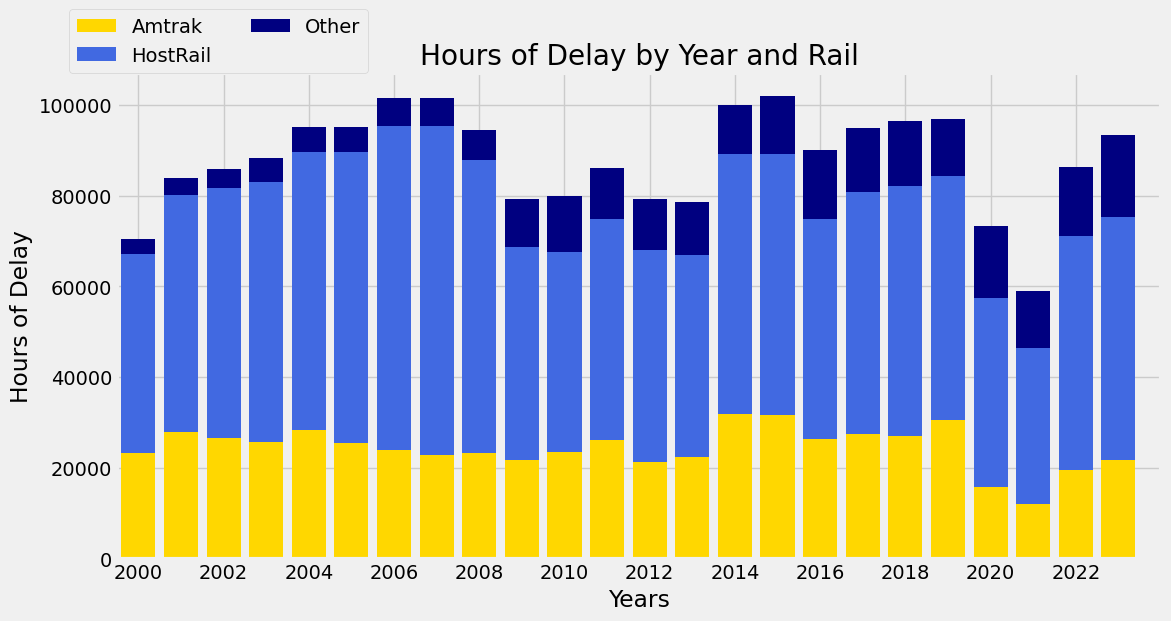

In [13]:


width = 0.5

#Rid of 'N' from data, allows numeric manipulation (ie fitting) rather than passing values as strings
data['Amtrak'] = pd.to_numeric(data['Amtrak'], errors='coerce')
data['HR'] = pd.to_numeric(data['HR'], errors='coerce')
data['Other'] = pd.to_numeric(data['Other'], errors='coerce')


#Bar Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each category as a stack
ax.bar(data.index, data['Amtrak'], label='Amtrak', color='gold')
ax.bar(data.index, data['HR'], bottom=data['Amtrak'], label='HostRail', color = 'royalblue')
ax.bar(data.index, data['Other'], bottom=data['Amtrak'] + data['HR'], label='Other', color='navy')

# Set labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Hours of Delay')
ax.set_title('Hours of Delay by Year and Rail')
plt.xlim(11.5,36)
plt.xticks([12,14,16,18,20,22,24,26,28,30,32,34], [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])

# Add legend
plt.legend(bbox_to_anchor=(.25, 1.15), ncol=2)

# Conclusion
Amtrak may (especially recently) shows lower numbers of delays, so both overall, and amtrak are reducing their delay hours. The majority of delays are the result of freight or host rails (since they get priority, and many lines overlap)

### So, how come delays are increasing over the years?
As the years go on, technology changes, we update infrastructure, and most importantly, we grow our demand for transportation both in goods and people. Below here, there is an analysis of the traffic in the form of traffic and the currently operated amtrak stations. These are not a perfect representation of exactly how many trains are active, but give a general insight into a possible cause of increased delays.

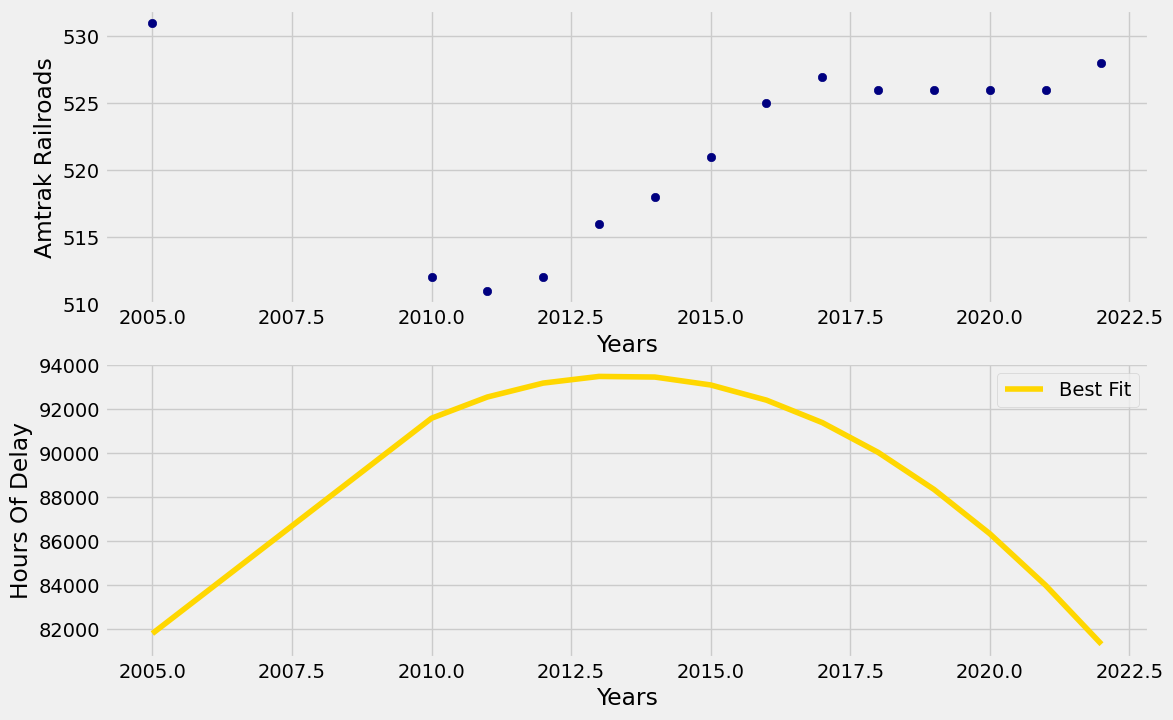

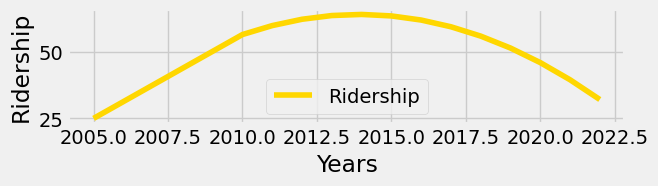

In [14]:
#Here we analyze railroads VS hours of delay (This is never used, since I combine traffic later)

fig = plt.figure(figsize=(12,8))
#This is the railroads overtime
plt.subplot(2,1,1)
plt.scatter(YearMask, up_railroads, color = 'navy', label = 'Amtrak Rails')
plt.xlabel('Years')
plt.ylabel('Amtrak Railroads') #Total rails throughout time, may indicate traffic

#Original Graph line
plt.subplot(2,1,2)
plt.plot(YearMask, best_fit_line((YearMask)), color = 'gold', label = 'Best Fit')
plt.legend()
plt.ylabel('Hours Of Delay')
plt.xlabel('Years')
plt.show()

#Ridership *Everything is a different scale so I kinda have to do this
plt.subplot(3,1,3)
plt.plot(YearMask, RiderLine((YearMask)), color = 'gold', label = 'Ridership')
plt.legend()
plt.ylabel('Ridership')
plt.xlabel('Years')
plt.show()


# Ridership has decreased
There is something to consider which is, do we want to consider the outliar? Specifically, when covid is included in the formula, does that reduce ridership by a drastic enough amount due to it being 'noise'? 

We explore this below. 

# Rails increased
Furthermore, rails increased, which is a possible indicator of more trains added to the overall train traffic. So we can say that Amtrak at the least is doing a good job of preventing increasing delays. 



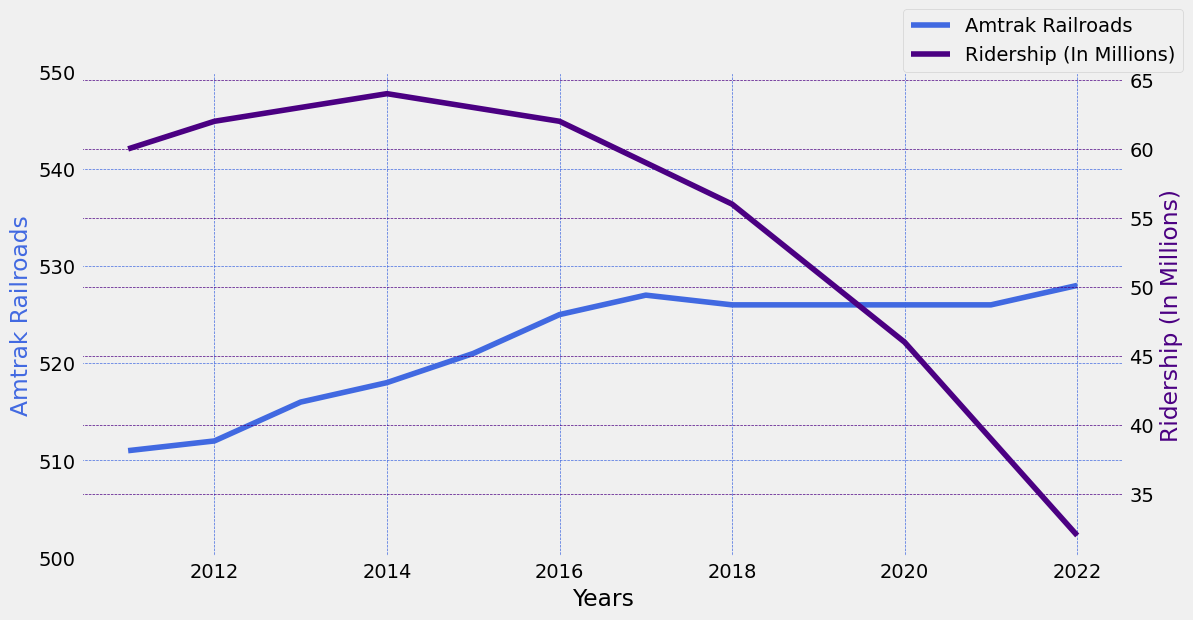

In [15]:
#One off year made it so the scale is yucky so we can just cut that off :>
RRMinus = up_railroads[2:]
YearMinus = YearMask[2:]


#nice resolution
fig, ax1 = plt.subplots(figsize=(12,6))

# plot the amtrak railroads (This is limited to the sample size of ridership)
ax1.plot(YearMinus, RRMinus, label='Amtrak Railroads', color = 'royalblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Amtrak Railroads',color = 'royalblue')
ax1.set_ylim(500,550) #Manual limits due to catastrophic drop
ax1.grid(color='royalblue', linestyle='--', linewidth=0.5)
# and graph against ridership, this shows trends of 'traffic' 

ax2 = ax1.twinx()
ax2.plot(YearMinus, RiderLine(YearMinus).astype(int), label='Ridership (In Millions)', color='indigo')
ax2.set_ylabel('Ridership (In Millions)', color='indigo')
ax2.grid(color='indigo', linestyle='--', linewidth=0.5)

fig.legend()



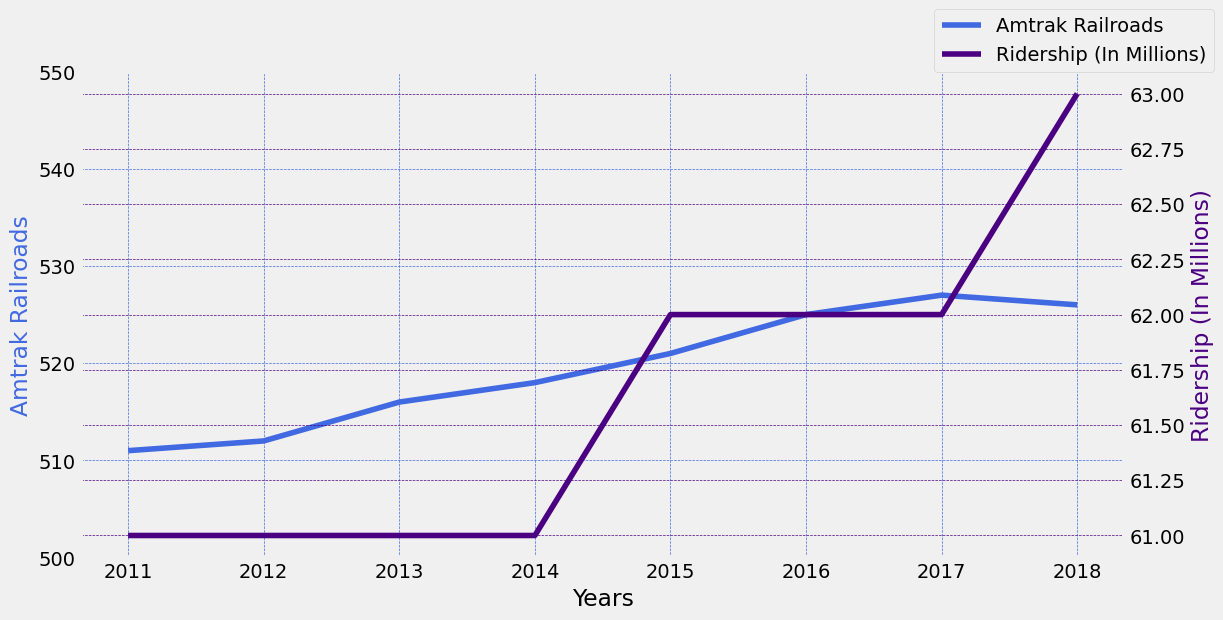

In [16]:
#One off year made it so the scale is yucky so we can just cut that off :>
RRMinusCovid = RRMinus[:-4]
YearMinusCovid = YearMinus[:-4]


#nice resolution
fig, ax1 = plt.subplots(figsize=(12,6))

# plot the amtrak railroads (This is limited to the sample size of ridership)
ax1.plot(YearMinusCovid, RRMinusCovid, label='Amtrak Railroads', color = 'royalblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Amtrak Railroads',color = 'royalblue')
ax1.set_ylim(500,550)
ax1.grid(color='royalblue', linestyle='--', linewidth=0.5)

RidersMinusCovid = Riders[2:-4]

#Every time we condense the data, we have to change the line as well
Coe = np.polyfit(YearMinusCovid, RidersMinusCovid, 2)
RiderMinusCovidLine = np.poly1d(Coe)

# and graph against ridership, this shows trends of 'traffic' 
ax2 = ax1.twinx()
ax2.plot(YearMinusCovid, RiderMinusCovidLine(YearMinusCovid).astype(int), label='Ridership (In Millions)', color='indigo')
ax2.set_ylabel('Ridership (In Millions)', color='indigo')
ax2.grid(color='indigo', linestyle='--', linewidth=0.5)

fig.legend()



# Omitting Covid indicates an increasing trend
Traffic, by these metrics should be increasing as the years go on. 

Lets also see how the line of delays is affected by removing covid

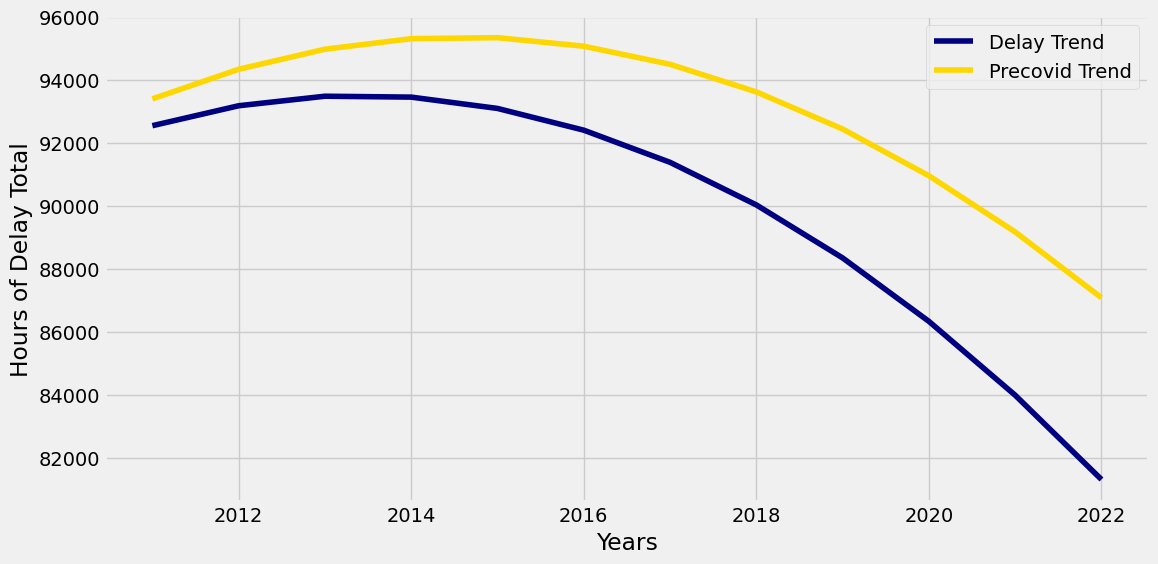

In [17]:
#nice resolution
plt.subplots(figsize=(12,6))


# This is the original line
plt.plot(YearMinus, best_fit_line((YearMinus)), color = 'Navy', label = 'Delay Trend')


#We fit to the data without covid here
Coe = np.polyfit(years[:-4], hod[:-4], 2)
noCovidLine = np.poly1d(Coe)

# plots the remaining trend omitting covid
plt.plot(YearMinus, noCovidLine((YearMinus)), color = 'gold', label = 'Precovid Trend')
plt.xlabel('Years')
plt.ylabel('Hours of Delay Total')




plt.legend()



# Takeaway
Even without including covid as it is noise, the trend is parabolic and continues to trend down. Its impossible to say that delays will reach 0, but they appear to be lowering still swiftly

### The governments affect on delays
In the last few years, President Biden had begun investing money into Amtrak to improve public transportation. Below I graph the investments to the hours of delay, to sort of demonstrate the correlation between increased funding and reduced delays. Unfortunately, while the spikes are at similar times, there is a delayed effect of investing such money into train infrastructure.

Text(0, 0.5, 'Overall Delays')

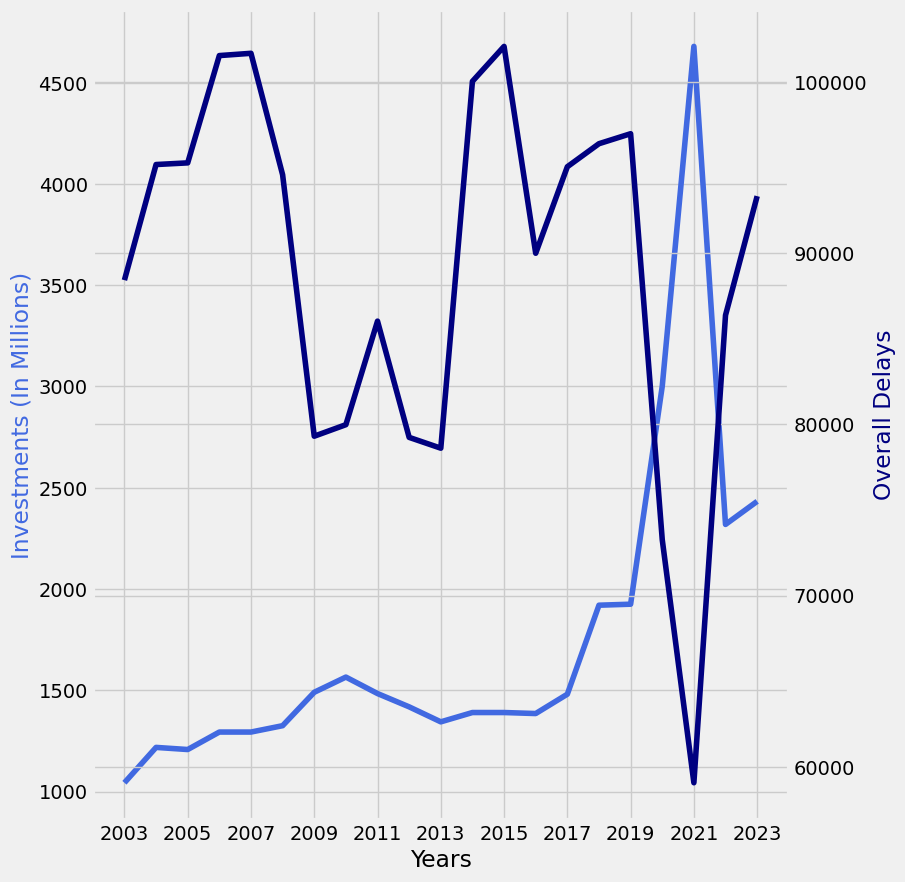

In [18]:
from matplotlib.ticker import FuncFormatter 

fname5 = '..//Data//Amtrak_Investments.csv'
investments = pd.read_csv(fname5)

#manual distribution of elements
investments = investments.iloc[32:53] #till 2023
hodShort = hod.iloc[13:36]
iYears = investments['Fiscal Year']
iMillions = investments['Total']

# plotting
fig, ax1 = plt.subplots(figsize=(12, 6))


# Investments from government
ax1.plot(iYears, iMillions, label='Investments (In Millions)', color = 'royalblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Investments (In Millions)', color = 'royalblue')

# weird formatting
ax1.set_xticks(iYears[::2]) # one two skip a few
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Some reason it becomes floats (scale likely) but this forces it to be ints



# Overall delays
ax2 = ax1.twinx()
ax2.plot(iYears, hodShort, label='Overall Delays', color='navy')
ax2.set_ylabel('Overall Delays', color='navy')



### Conclusion:
>We can see a growth in the total railroads used by both Amtrak and other rail companies
>Despite the growth, the delays are actually reducing


##### Note: There are some omitted data points causing potential confusion within the dataset, namely 2023 has 0 Rails.

